In [93]:
import torch
from torchvision import datasets,transforms
from skimage.feature import local_binary_pattern,hog
import matplotlib.pyplot as plt
from skimage import color
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [94]:
def extract_hog_features(dataloader):
    hog_features_list = []
    labels_list = []
    
    for images, labels in dataloader:
        for i in range(images.shape[0]):
            img = images[i] * 0.5 + 0.5  # Denormalize
            img = img.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
            gray_img = color.rgb2gray(img)  # Convert to grayscale
            
            # Extract HOG features
            hog_features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            
            hog_features_list.append(hog_features)
            labels_list.append(labels[i].item())
    
    return np.array(hog_features_list), np.array(labels_list)

In [95]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root='./../datasets', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./../datasets', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1300, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1300, shuffle=False)

images, labels = next(iter(trainloader))

In [96]:
# Extract HOG features for train and test sets
X_train, y_train = extract_hog_features(trainloader)
X_test, y_test = extract_hog_features(testloader)


In [97]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')  # Try different values of k
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

# Detailed classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.4879
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.59      1000
           1       0.65      0.69      0.67      1000
           2       0.49      0.35      0.40      1000
           3       0.37      0.16      0.22      1000
           4       0.28      0.63      0.39      1000
           5       0.51      0.29      0.37      1000
           6       0.36      0.78      0.49      1000
           7       0.76      0.42      0.54      1000
           8       0.67      0.54      0.59      1000
           9       0.72      0.51      0.60      1000

    accuracy                           0.49     10000
   macro avg       0.55      0.49      0.49     10000
weighted avg       0.55      0.49      0.49     10000



In [98]:
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)

# Train a classifier (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forests Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Random Forests Classification Report:\n", classification_report(y_test, y_pred))

Train Features Shape: (50000, 324)
Test Features Shape: (10000, 324)
Random Forests Accuracy: 0.5012
Random Forests Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      1000
           1       0.56      0.67      0.61      1000
           2       0.42      0.35      0.39      1000
           3       0.36      0.26      0.30      1000
           4       0.41      0.41      0.41      1000
           5       0.39      0.44      0.42      1000
           6       0.49      0.62      0.55      1000
           7       0.59      0.51      0.55      1000
           8       0.58      0.58      0.58      1000
           9       0.58      0.56      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


length: 1300


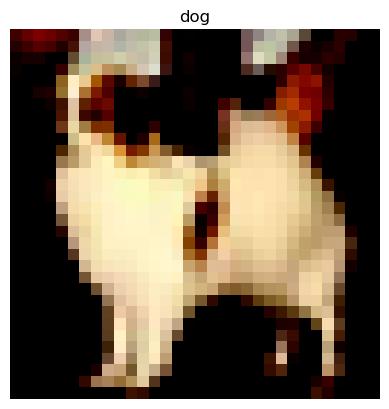

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


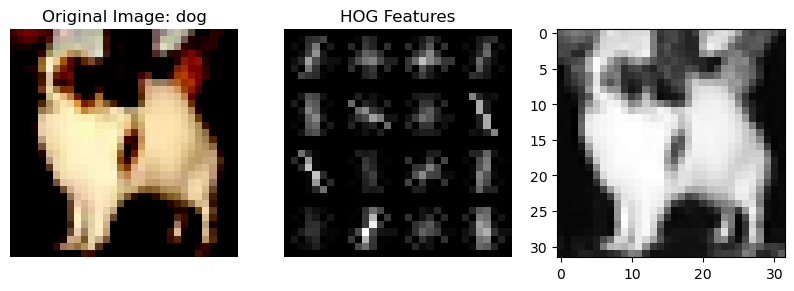

In [99]:
i = random.randint(1,100)
print(f'length: {len(images)}')
image = images[i]
label = labels[i]
image = image.permute(1, 2, 0)

# Plot the image
plt.imshow(image)
plt.title(trainset.classes[label])  # Get class label
plt.axis("off")
plt.show()

gray_image = color.rgb2gray(image)  # Convert to grayscale

# gray_image = gray_image / 255.0  # Normalize to range [0,1]
# plt.imshow(gray_image)
# plt.title('gray image')
# plt.show()

# Apply HOG feature extraction
hog_features, hog_image = hog(gray_image, 
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2), 
                              visualize=True)

# Plot original and HOG image
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title(f"Original Image: {trainset.classes[label]}")
ax[0].axis("off")

ax[1].imshow(hog_image, cmap="gray")
ax[1].set_title("HOG Features")
ax[1].axis("off")

ax[2].imshow(gray_image,cmap="gray")
plt.show()